# Dimentionality Reduction (Embeddings)

## Principal Component Analysis
Scaled (normalized) X values are required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

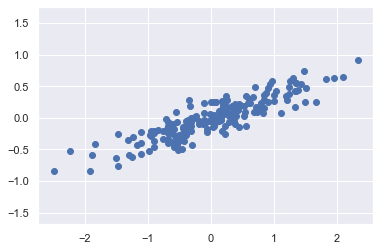

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
# PCA implementation
def simple_pca(X):
    # Data matrix X, assumes 0-centered
    n, m = X.shape
    np.allclose(X.mean(axis=0), np.zeros(m))
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)
    return X_pca

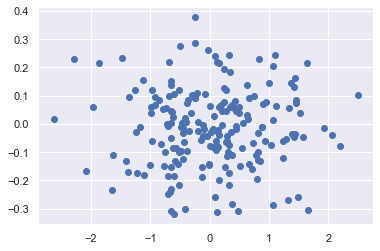

In [4]:
X_pca = simple_pca(X)
plt.scatter(x=X_pca[:,0],y=X_pca[:,1]);

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

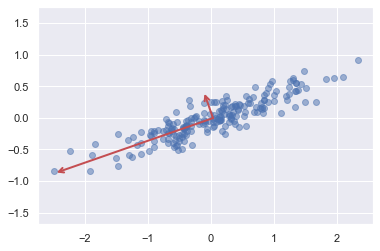

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [8]:
print('Components (or slope and intercept) of the vectors:')
print(pca.components_)
print('\n')
print('Here the first component explain 76% of the variation (and the second 2%):')
print(pca.explained_variance_)

Components (or slope and intercept) of the vectors:
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Here the first component explain 76% of the variation (and the second 2%):
[0.7625315 0.0184779]


### PCA for vizualising high dimensions data

(1797, 64)
(1797, 2)


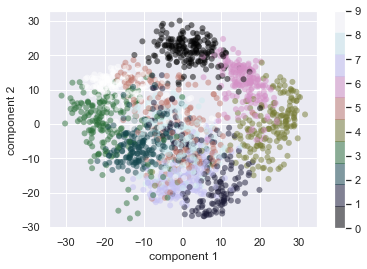

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Choosing the number of components

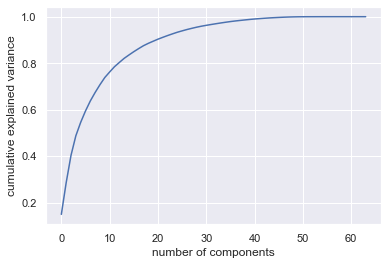

In [10]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# the first 10 components contain approximately 75% of the variance

### Noise filtering

In [11]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

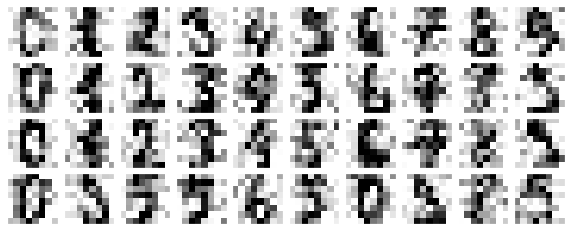

In [12]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Nb of components: 12


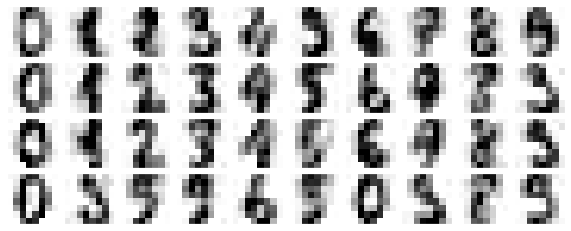

In [13]:
# get the components that explain 50% of the variation
pca = PCA(0.50).fit(noisy)
print(f'Nb of components: {pca.n_components_}')

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## UMAP

Uniform Manifold Approximations (UMAP) is an algorithm that approximates the manifold as a locally-connected graph and maintains the overall [topology](https://en.wikipedia.org/wiki/Topology) (disconnected parts, holes, etc.) in the original data.


This is great to visualize complex data, as it naturally learns clusters with relative positioning. It also scales well to larger datasets compared to other options.

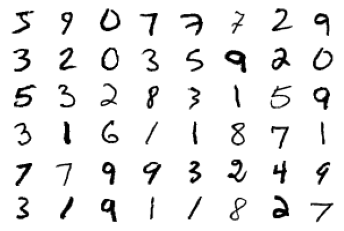

In [14]:
# pip install umap-learn # or
# conda update conda
# conda install -c conda-forge umap-learn
import umap
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, return_X_y=False, as_frame=False)
mnist.target = mnist.target.astype(int)
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

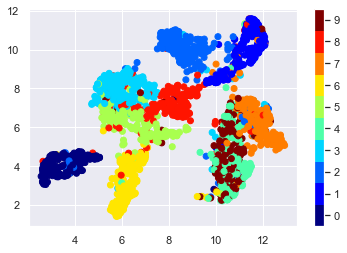

In [15]:
# use only 1/30 of the data
data = mnist.data[::30]
target = mnist.target[::30]

model = umap.UMAP(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

## Some Thoughts on Manifold Methods (UMAP, MDA, LLE, T-SNE)

Though this story and motivation is compelling, in practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:

- In manifold learning, the presence of noise in the data can "short-circuit" the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.

- The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.

- In manifold learning, the globally optimal number of output dimensions is difficult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.

- In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.


With all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data; for that reason I tend to explore data with manifold methods only after first exploring them with PCA.

In [ ]:
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b